<a href="https://colab.research.google.com/github/HowardHNguyen/Marketing_Data_Science/blob/main/Unsupervised_Learning_and_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Activity 3.01 - Bank Customer Segmentation for Loan Campaign

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
#
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [27]:
bank0 = pd.read_csv("/content/drive/MyDrive/_Python/Data-Science-for-Marketing-Analytics-Second-Ed/Chapter03/Datasets/Bank_Personal_Loan_Modelling-1.csv")
bank0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [28]:
bank0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [29]:
# Perform standard scaling on the Income and CCAvg columns: to create new columns, Income_scaled and CCAvg_scaled.
# We will be using these two variables for customer segmentation. Get a descriptive summary of the
# processed columns to verify that the scaling has been applied correctly:
scaler = StandardScaler()

bank0[['Income_scaled', 'CCAvg_scaled']] = scaler.fit_transform(bank0[['Income', 'CCAvg']])

bank0[['Income_scaled', 'CCAvg_scaled']].describe()

,Income_scaled,CCAvg_scaled
count,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


Descriptive summary of the processed columns

**Perform k-means clustering**

specifying 3 clusters using Income and CCAvg as the features. Specify random_state as 42. Create a new column, Cluster, containing the predicted cluster from the model:

In [30]:
model = KMeans(n_clusters=3, random_state=42)

cluster_cols = ['Income_scaled', 'CCAvg_scaled']
model.fit(bank0[cluster_cols])

bank0['Cluster'] = model.predict(bank0[cluster_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
bank0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_scaled,CCAvg_scaled,Cluster
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,-0.538229,-0.193385,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,-0.864109,-0.250611,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,-1.363793,-0.536736,1
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.569765,0.436091,2
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,-0.625130,-0.536736,1


**Visualize the clusters**

by using different markers and colors for the clusters on a scatter plot between Income and CCAvg:

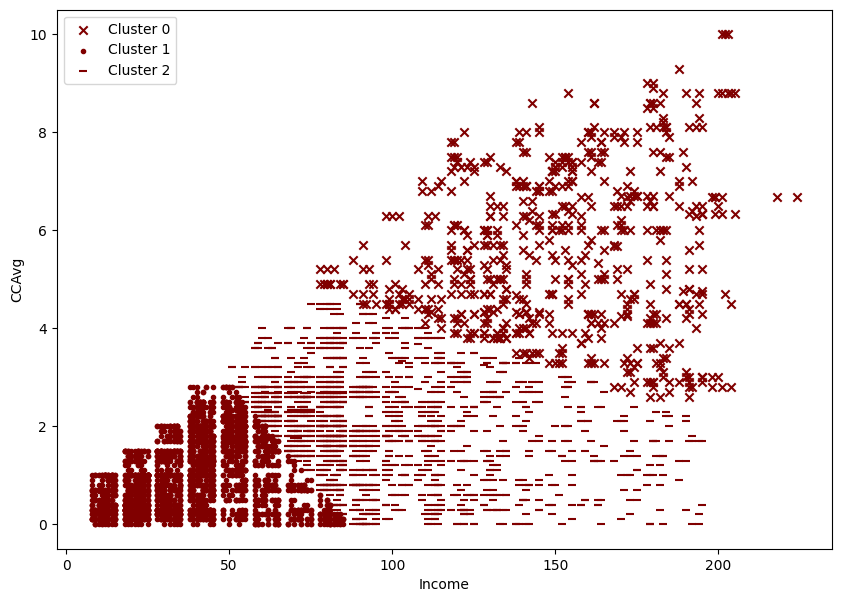

In [32]:
markers = ['x', '.', '_']

plt.figure(figsize=[10,7])
for clust in range(3):
    temp = bank0[bank0.Cluster == clust]
    plt.scatter(temp.Income, temp.CCAvg,
                marker=markers[clust],
                color='maroon',
                label="Cluster "+str(clust) )

plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()
plt.show()

In [33]:
# Print the average values of Income and CCAvg for three clusters
bank0.groupby('Cluster')[['Income', 'CCAvg']].mean()

,Income,CCAvg
Cluster,,
0,150.390282,5.540345
1,39.135072,0.982417
2,96.142777,2.025165


We can see that both Income and CCAvg vary significantly by the clusters

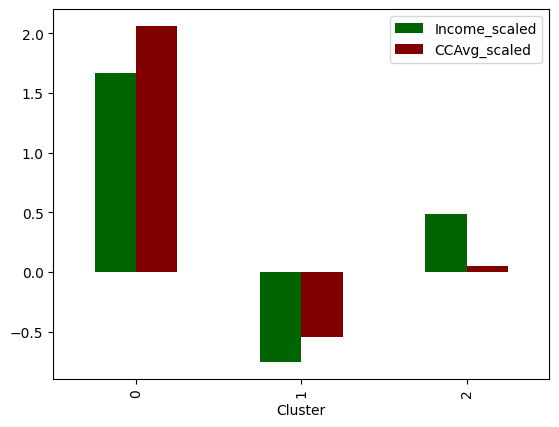

In [34]:
# Perform a visual comparison of the clusters using the standardized values for Income and CCAvg
bank0.groupby('Cluster')[['Income_scaled', 'CCAvg_scaled']].mean().plot.bar(color=['darkgreen','maroon'])
plt.show()

We can see the average values of the features against each cluster
on a "standardized" scale. Notice how Cluster 0 is closer to the average (0 on
the standard scale) for both Income and CCAvg. Cluster 2 is much higher
on both these variables, while Cluster 1 has lower-than-average values for
both variables.

To understand the clusters better using other relevant features, print the average values against the clusters for the Age, Mortgage, Family, CreditCard, Online, and Personal Loan features and check which cluster has the highest propensity for taking a personal loan.

In [35]:
# to get the average values against the clusters, use a simple groupby and mean calculation:
sel_cols = ['Income', 'CCAvg', 'Age', 'Mortgage', 'Family', 'CreditCard', 'Online', 'Personal Loan']
bank0.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,
0,150.390282,5.540345,43.924765,89.537618,2.017241,0.285266,0.605016,0.413793
1,39.135072,0.982417,45.797197,42.231218,2.513429,0.294667,0.592448,0.000000
2,96.142777,2.025165,45.184049,65.185165,2.363636,0.296152,0.600112,0.120468


As the results we get on the table above. The clusters have vastly different propensities for taking up a personal loan.

Cluster 2 has the highest by far – about 42% – while Cluster 1 has 0
chance of taking a loan.

We can see that the clusters discovered here correlate well with and can be used for marketing campaigns around personal loans.

Based on your understanding of the clusters, assign descriptive labels for
the clusters.

Key differentiating features for the clusters are Income, CCAvg,
and Mortgage.

Some basic labels for these clusters could be the following:

- Cluster 0: Average Joes (medium income, medium spend)
- Cluster 1: Low spend potential (low income, low spend)
- Cluster 2: High rollers (high income, high spend)

## Activity 3.02 - Bank Customer Segmentation with Multiple Features

Create a copy of the dataset named bank_scaled and perform standard scaling of the Income, CCAvg, Age, Experience, and Mortgage columns on it.

In [36]:
bank_scaled = bank0.copy()

cluster_cols = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage']

bank_scaled[cluster_cols] = scaler.fit_transform(bank_scaled[cluster_cols])

In [37]:
# get a descriptive summary of the processed columns to verify that the scaling has been applied correctly.
bank_scaled[cluster_cols].describe()

,Income,CCAvg,Age,Experience,Mortgage
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17,-2.131628e-18,-1.179501e-16,-5.613288e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00,-1.948906e+00,-2.014911e+00,-5.555239e-01
25%,-7.554825e-01,-7.084116e-01,-9.019702e-01,-8.812043e-01,-5.555239e-01
50%,-2.123482e-01,-2.506106e-01,-2.952359e-02,-9.121982e-03,-5.555239e-01
75%,5.263146e-01,3.216407e-01,8.429230e-01,8.629604e-01,4.375576e-01
max,3.263712e+00,4.613525e+00,1.889859e+00,1.996667e+00,5.688108e+00


The mean values are all practically 0 and the standard deviation is 1, confirming that the standardization was done correctly.

**K-means clustering**

Perform k-mean clustering specifying 3 clusters using scaled features.

In [38]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(bank_scaled[cluster_cols])

bank_scaled['Cluster'] = model.predict(bank_scaled[cluster_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
# Using PCA on the scaled columns, create two new columns, pc1 and pc2,
# containing the data for PC1 and PC2 respectively:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(bank_scaled[cluster_cols])

bank_scaled['pc1'] = pca_res[:,0]
bank_scaled['pc2'] = pca_res[:,1]

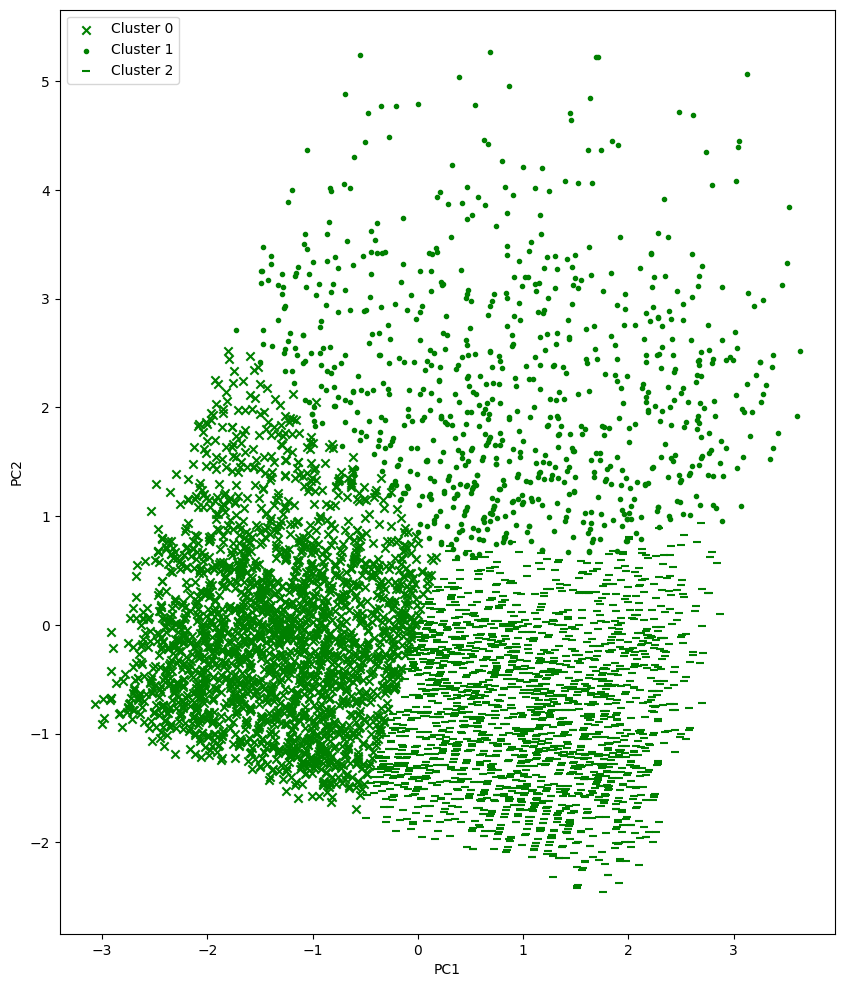

In [40]:
# Visualize the clusters by using different markers and colors for the clusters on a
# scatter plot between pc1 and pc2:
markers = ['x', '.', '_']
plt.figure(figsize=[10,12])

for clust in range(3):
    temp = bank_scaled[bank_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
                label="Cluster "+str(clust), \
                color='green')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
# A plot of the data reduced to two dimensions denoting the three clusters

Print the average values of the original features used for clustering against
the three clusters and check which features are the most differentiated for
the clusters.

We first create a new column, Cluster, in bank0, the dataset containing the variables on the original scale. We then calculate the mean for each clustering by using groupby as in the following code:

In [41]:
bank0['Cluster'] = bank_scaled.Cluster
bank0.groupby('Cluster')[cluster_cols].mean()

,Income,CCAvg,Age,Experience,Mortgage
Cluster,,,,,
0,58.941774,1.367514,55.536044,30.233826,45.134935
1,147.650185,4.856403,43.672435,18.644005,116.279357
2,60.124322,1.382121,35.116428,9.873705,44.771584


We see that it is only Age and Experience that are different across the three
clusters. All other features have similar values for two of the three clusters.

To understand the clusters better using other relevant features, print the
average values against the clusters for the Age, Mortgage, Family,
CreditCard, Online, and Personal Loan features and check which cluster
has the highest propensity for taking a personal loan:

In [42]:
sel_cols = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage', \
            'Family', 'CreditCard', 'Online', 'Personal Loan']

bank0.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Experience,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,,
0,58.941774,1.367514,55.536044,30.233826,45.134935,2.397874,0.300370,0.604898,0.039741
1,147.650185,4.856403,43.672435,18.644005,116.279357,2.002472,0.299135,0.613103,0.398022
2,60.124322,1.382121,35.116428,9.873705,44.771584,2.552047,0.285150,0.581648,0.035520


Now, while the data doesn't explicitly indicate Personal Loan acceptance rates, we can make some general assumptions:

Cluster 1, with its high income, high credit card spending, and strong online presence, may be more likely to have individuals with better creditworthiness, and thus a better chance of obtaining a Personal Loan.

Cluster 0 and Cluster 2, with lower income and credit card spending, may have individuals with a lower creditworthiness on average and may have a comparatively lower chance of obtaining a Personal Loan.

Please note that these are general assumptions based on the available data. To make a more accurate assessment of Personal Loan eligibility, additional factors such as credit scores, employment status, and loan history would be needed.